In [1]:
import pandas as pd

# 读取xlsx文件
df = pd.read_excel("in20210601.xlsx")

# 打印各列的数据类型
print("收货地点:", df['收货地点'].dtype)
print("订单开始时间:", df['订单开始时间'].dtype)
print("订单结束时间:", df['订单结束时间'].dtype)
print("货物吨数:", df['货物吨数'].dtype)
print("发货地点坐标:", df['发货地点坐标'].dtype)
print("收货地点坐标:", df['收货地点坐标'].dtype)


收货地点: object
订单开始时间: datetime64[ns]
订单结束时间: datetime64[ns]
货物吨数: float64
发货地点坐标: object
收货地点坐标: object


In [2]:
# 定义一个函数来拆分位置坐标，并返回数值型的坐标
def split_coordinates(coord):
    # 使用eval函数将字符串转换为元组
    coord_tuple = eval(coord)
    # 拆分元组，并返回数值型坐标
    return pd.Series(coord_tuple)

# 对发货地点坐标列进行拆分，并创建新的列
df[['发货地点纬度', '发货地点经度']] = df['发货地点坐标'].apply(split_coordinates)
# 对收货地点坐标列进行拆分，并创建新的列
df[['收货地点纬度', '收货地点经度']] = df['收货地点坐标'].apply(split_coordinates)

# 将新的列转换为数值型
df['发货地点纬度'] = df['发货地点纬度'].astype(float)
df['发货地点经度'] = df['发货地点经度'].astype(float)
df['收货地点纬度'] = df['收货地点纬度'].astype(float)
df['收货地点经度'] = df['收货地点经度'].astype(float)

# 打印转换后的DataFrame
print(df.head())

                     发货地点                                       收货地点  \
0  广西壮族自治区南宁市西乡塘区明秀西路154号                    广西百色市田东县大桥旁边国家粮食储备库内检1库   
1  广西壮族自治区南宁市西乡塘区明秀西路154号                      广西河池市巴马县教育小区第三排（京东隔壁）   
2  广西壮族自治区南宁市西乡塘区明秀西路154号                    广西壮族自治区柳州市融安县长安镇新兴路125号   
3  广西壮族自治区南宁市西乡塘区明秀西路154号                      云南省昆明市官渡区凉亭中路156号新储物流   
4  广西壮族自治区南宁市西乡塘区明秀西路154号  云南省昆明市官渡区自贸区经开区阿拉乡普照社区大麻苴居民小组马帮物流园区三期六号仓库   

      订单开始时间     订单结束时间    货物吨数                                  发货地点坐标  \
0 2021-06-01 2021-06-04  31.800  (22.825895672977595, 108.292608989272)   
1 2021-06-01 2021-06-04  32.112  (22.825895672977595, 108.292608989272)   
2 2021-06-01 2021-06-04  32.105  (22.825895672977595, 108.292608989272)   
3 2021-06-01 2021-06-04  32.105  (22.825895672977595, 108.292608989272)   
4 2021-06-01 2021-06-04  32.105  (22.825895672977595, 108.292608989272)   

                                     收货地点坐标     发货地点纬度      发货地点经度     收货地点纬度  \
0  (23.362602584660035, 106.3216419

# 可视化

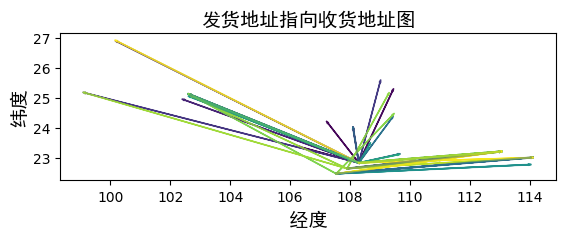

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontProperties

# 读取xlsx文件


# 设置中文字体
font = FontProperties(fname=r"C:\\Windows\\Fonts\\simhei.ttf", size=14)

# 绘制发货地址指向收货地址的图
def plot_shipments(df):
    fig, ax = plt.subplots()
    
    # 生成颜色列表，可以根据订单数量自动生成不同颜色
    colors = plt.cm.viridis(np.linspace(0, 1, len(df)))
    
    # 遍历每一行数据
    for index, row in df.iterrows():
        # 提取发货地址和收货地址的经纬度
        start = (row['发货地点纬度'], row['发货地点经度'])
        end = (row['收货地点纬度'], row['收货地点经度'])
        
        # 随机选择一种颜色
        color = colors[index]
        
        # 绘制连接线
        ax.plot([start[1], end[1]], [start[0], end[0]], color=color, alpha=0.2)
        
        # 添加箭头
        ax.annotate('', xy=end, xytext=start, arrowprops=dict(arrowstyle="->", color=color))
         # 在中间点添加小箭头
        mid_point = ((start[0] + end[0]) / 2, (start[1] + end[1]) / 2)
        ax.annotate('', xy=end, xytext=start, arrowprops=dict(arrowstyle="->", color=color))
        ax.annotate('', xy=mid_point, xytext=start, arrowprops=dict(arrowstyle="-", color=color))
     # 计算箭头方向
        arrow_direction = (end[0] - start[0], end[1] - start[1])
        
        # 绘制箭头
        ax.arrow(start[1], start[0], arrow_direction[1], arrow_direction[0], head_width=0.05, head_length=0.1, fc=color, ec=color)
    ax.set_aspect('equal', 'box')
    ax.set_xlabel('经度', fontproperties=font)
    ax.set_ylabel('纬度', fontproperties=font)
    ax.set_title('发货地址指向收货地址图', fontproperties=font)
    
    plt.show()

# 绘制发货地址指向收货地址的图
plot_shipments(df)


# 聚类

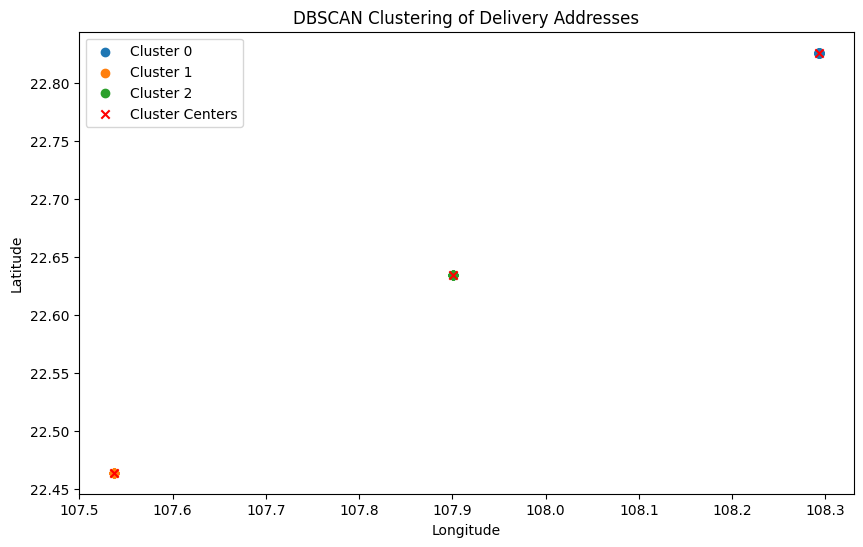

In [12]:

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from geopy.distance import great_circle



# 提取发货地址的经纬度信息
coordinates = df[['发货地点纬度', '发货地点经度']]

# 标准化数据
scaler = StandardScaler()
coordinates_scaled = scaler.fit_transform(coordinates)

# DBSCAN 聚类
dbscan = DBSCAN(eps=0.1, min_samples=3, metric='euclidean')
clusters = dbscan.fit_predict(coordinates_scaled)

# 将聚类结果添加到原始数据中
df['Cluster'] = clusters

# 计算每个类别的中心点
cluster_centers = []
for cluster_id in np.unique(clusters):
    if cluster_id != -1:  # -1 表示噪声点
        cluster_points = coordinates_scaled[clusters == cluster_id]
        cluster_center = cluster_points.mean(axis=0)
        cluster_center = scaler.inverse_transform(cluster_center.reshape(1, -1))
        cluster_centers.append(cluster_center[0])

# 可视化聚类结果
plt.figure(figsize=(10, 6))
for cluster_id in np.unique(clusters):
    if cluster_id != -1:
        cluster_points = coordinates[clusters == cluster_id]
        plt.scatter(cluster_points['发货地点经度'], cluster_points['发货地点纬度'], label=f'Cluster {cluster_id}')

# 绘制聚类中心点
cluster_centers = np.array(cluster_centers)
plt.scatter(cluster_centers[:, 1], cluster_centers[:, 0], marker='x', color='red', label='Cluster Centers')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('DBSCAN Clustering of Delivery Addresses')
plt.legend()
plt.show()


C:\Users\23948\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


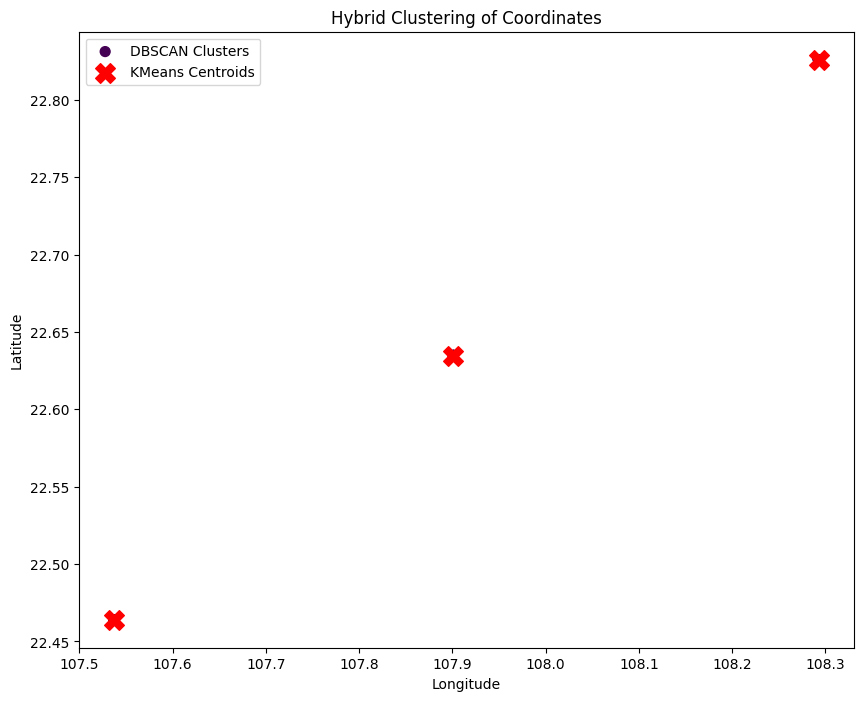

In [14]:
import pandas as pd
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np
import matplotlib.pyplot as plt


coordinates = df[['发货地点纬度', '发货地点经度']]


# 距离矩阵计算函数
def euclidean_distance_matrix(coordinates):
    return euclidean_distances(coordinates, coordinates)

# DBSCAN 聚类函数
def dbscan_clustering(coordinates, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='precomputed')
    clusters = dbscan.fit_predict(coordinates)
    return clusters

# KMeans 聚类函数
def kmeans_clustering(coordinates, num_clusters):
    kmeans = KMeans(n_clusters=num_clusters)
    clusters = kmeans.fit_predict(coordinates)
    return clusters, kmeans.cluster_centers_

# 混合聚类函数
def hybrid_clustering(coordinates, eps, min_samples, num_clusters):
    # 使用 DBSCAN 聚类
    distance_matrix = euclidean_distance_matrix(coordinates)
    dbscan_clusters = dbscan_clustering(distance_matrix, eps, min_samples)

    # 使用 KMeans 聚类
    clustered_coordinates = coordinates[dbscan_clusters != -1]
    kmeans_clusters, centroids = kmeans_clustering(clustered_coordinates, num_clusters)

    return dbscan_clusters, kmeans_clusters, centroids

# 参数设置
eps = 10  # DBSCAN 聚类半径
min_samples = 15  # DBSCAN 最小样本数
num_clusters = 3  # KMeans 聚类簇数

# 基于混合算法的聚类
coordinates = df[['发货地点纬度', '发货地点经度']].values
dbscan_clusters, kmeans_clusters, centroids = hybrid_clustering(coordinates, eps, min_samples, num_clusters)

# 绘制聚类结果
plt.figure(figsize=(10, 8))
plt.scatter(df['发货地点经度'], df['发货地点纬度'], c=dbscan_clusters, cmap='viridis', s=50, label='DBSCAN Clusters')
plt.scatter(centroids[:, 1], centroids[:, 0], c='red', marker='X', s=200, label='KMeans Centroids')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Hybrid Clustering of Coordinates')
plt.legend()
plt.show()


In [8]:
centroids

array([[ 22.82589567, 108.29260899],
       [ 22.464021  , 107.53705078],
       [ 22.63476185, 107.90104256]])

In [15]:
 kmeans_clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2,
       2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 0, 0])

In [30]:
for i in range(num_clusters):
    cluster_points = df.iloc[kmeans_clusters == i]
    print(f'Cluster {i+1} points:')
    print(cluster_points)
    print()

Cluster 1 points:
                      发货地点                                       收货地点  \
0   广西壮族自治区南宁市西乡塘区明秀西路154号                    广西百色市田东县大桥旁边国家粮食储备库内检1库   
1   广西壮族自治区南宁市西乡塘区明秀西路154号                      广西河池市巴马县教育小区第三排（京东隔壁）   
2   广西壮族自治区南宁市西乡塘区明秀西路154号                    广西壮族自治区柳州市融安县长安镇新兴路125号   
3   广西壮族自治区南宁市西乡塘区明秀西路154号                      云南省昆明市官渡区凉亭中路156号新储物流   
4   广西壮族自治区南宁市西乡塘区明秀西路154号  云南省昆明市官渡区自贸区经开区阿拉乡普照社区大麻苴居民小组马帮物流园区三期六号仓库   
5   广西壮族自治区南宁市西乡塘区明秀西路154号                          广西河池市都安县安阳镇沿江路39号   
6   广西壮族自治区南宁市西乡塘区明秀西路154号           云南省昆明市五华区普吉路普吉社区普吉第二村民小组（原丽石石材厂）   
7   广西壮族自治区南宁市西乡塘区明秀西路154号                          广西河池市都安县安阳镇沿江路39号   
8   广西壮族自治区南宁市西乡塘区明秀西路154号               云南省昆明市安宁市连然街道办事处宝兴宁和家园2-6号商铺   
9   广西壮族自治区南宁市西乡塘区明秀西路154号                      云南省昆明市官渡区凉亭中路156号新储物流   
10  广西壮族自治区南宁市西乡塘区明秀西路154号         云南省丽江市古城区祥和街道顺和社区庆云东路393-1号BA-04-5   
11  广西壮族自治区南宁市西乡塘区明秀西路154号           云南省昆明市五华区普吉路普吉社区普吉第二村民小组（原丽石石材厂）   
12  广西壮族自治区南宁市西乡塘区明秀西路154号       

In [14]:
df

,发货地点,收货地点,订单开始时间,订单结束时间,货物吨数,发货地点坐标,收货地点坐标,发货地点纬度,发货地点经度,收货地点纬度,收货地点经度,Cluster
0,广西壮族自治区南宁市西乡塘区明秀西路154号,广西百色市田东县大桥旁边国家粮食储备库内检1库,2021-06-01,2021-06-04,31.800,"(22.825895672977595, 108.292608989272)","(23.362602584660035, 106.32164199082185)",22.825896,108.292609,23.362603,106.321642,0
1,广西壮族自治区南宁市西乡塘区明秀西路154号,广西河池市巴马县教育小区第三排（京东隔壁）,2021-06-01,2021-06-04,32.112,"(22.825895672977595, 108.292608989272)","(24.14559630407174, 107.26709722111191)",22.825896,108.292609,24.145596,107.267097,0
2,广西壮族自治区南宁市西乡塘区明秀西路154号,广西壮族自治区柳州市融安县长安镇新兴路125号,2021-06-01,2021-06-04,32.105,"(22.825895672977595, 108.292608989272)","(25.219656574811633, 109.41440114195971)",22.825896,108.292609,25.219657,109.414401,0
3,广西壮族自治区南宁市西乡塘区明秀西路154号,云南省昆明市官渡区凉亭中路156号新储物流,2021-06-01,2021-06-04,32.105,"(22.825895672977595, 108.292608989272)","(25.02799229207998, 102.7685850778764)",22.825896,108.292609,25.027992,102.768585,0
4,广西壮族自治区南宁市西乡塘区明秀西路154号,云南省昆明市官渡区自贸区经开区阿拉乡普照社区大麻苴居民小组马帮物流园区三期六号仓库,2021-06-01,2021-06-04,32.105,"(22.825895672977595, 108.292608989272)","(25.000358547145368, 102.79161996673896)",22.825896,108.292609,25.000359,102.791620,0
...,...,...,...,...,...,...,...,...,...,...,...,...
73,广西壮族自治区南宁市西乡塘区明秀西路154号,广东佛山市南海区狮山镇小塘金达路12号维他奶有限公司2号岗,2021-06-01,2021-06-04,32.010,"(22.825895672977595, 108.292608989272)","(23.19837217482141, 112.9743092513664)",22.825896,108.292609,23.198372,112.974309,0
74,广西崇左市江州区工业大道1号中粮屯河崇左糖业有限公司,广东佛山市南海区狮山镇小塘金达路12号维他奶有限公司2号岗,2021-06-01,2021-06-04,31.308,"(22.464021003628616, 107.53705078270936)","(23.19837217482141, 112.9743092513664)",22.464021,107.537051,23.198372,112.974309,1
75,广西崇左市江州区工业大道1号中粮屯河崇左糖业有限公司,广东佛山市南海区狮山镇小塘金达路12号维他奶有限公司2号岗,2021-06-01,2021-06-04,30.888,"(22.464021003628616, 107.53705078270936)","(23.19837217482141, 112.9743092513664)",22.464021,107.537051,23.198372,112.974309,1
76,广西壮族自治区南宁市西乡塘区明秀西路154号,广东省东莞市常平镇四纵路3号,2021-06-01,2021-06-04,32.700,"(22.825895672977595, 108.292608989272)","(23.00081197299096, 114.02777997004036)",22.825896,108.292609,23.000812,114.027780,0


In [27]:
# 输出DataFrame中的所有列名
print(df.columns)
df


Index(['发货地点', '收货地点', '订单开始时间', '订单结束时间', '货物吨数', '发货地点坐标', '收货地点坐标',
       '发货地点纬度', '发货地点经度', '收货地点纬度', '收货地点经度', 'Cluster'],
      dtype='object')


,发货地点,收货地点,订单开始时间,订单结束时间,货物吨数,发货地点坐标,收货地点坐标,发货地点纬度,发货地点经度,收货地点纬度,收货地点经度,Cluster
0,广西壮族自治区南宁市西乡塘区明秀西路154号,广西百色市田东县大桥旁边国家粮食储备库内检1库,2021-06-01,2021-06-04,31.800,"(22.825895672977595, 108.292608989272)","(23.362602584660035, 106.32164199082185)",22.825896,108.292609,23.362603,106.321642,0
1,广西壮族自治区南宁市西乡塘区明秀西路154号,广西河池市巴马县教育小区第三排（京东隔壁）,2021-06-01,2021-06-04,32.112,"(22.825895672977595, 108.292608989272)","(24.14559630407174, 107.26709722111191)",22.825896,108.292609,24.145596,107.267097,0
2,广西壮族自治区南宁市西乡塘区明秀西路154号,广西壮族自治区柳州市融安县长安镇新兴路125号,2021-06-01,2021-06-04,32.105,"(22.825895672977595, 108.292608989272)","(25.219656574811633, 109.41440114195971)",22.825896,108.292609,25.219657,109.414401,0
3,广西壮族自治区南宁市西乡塘区明秀西路154号,云南省昆明市官渡区凉亭中路156号新储物流,2021-06-01,2021-06-04,32.105,"(22.825895672977595, 108.292608989272)","(25.02799229207998, 102.7685850778764)",22.825896,108.292609,25.027992,102.768585,0
4,广西壮族自治区南宁市西乡塘区明秀西路154号,云南省昆明市官渡区自贸区经开区阿拉乡普照社区大麻苴居民小组马帮物流园区三期六号仓库,2021-06-01,2021-06-04,32.105,"(22.825895672977595, 108.292608989272)","(25.000358547145368, 102.79161996673896)",22.825896,108.292609,25.000359,102.791620,0
...,...,...,...,...,...,...,...,...,...,...,...,...
73,广西壮族自治区南宁市西乡塘区明秀西路154号,广东佛山市南海区狮山镇小塘金达路12号维他奶有限公司2号岗,2021-06-01,2021-06-04,32.010,"(22.825895672977595, 108.292608989272)","(23.19837217482141, 112.9743092513664)",22.825896,108.292609,23.198372,112.974309,0
74,广西崇左市江州区工业大道1号中粮屯河崇左糖业有限公司,广东佛山市南海区狮山镇小塘金达路12号维他奶有限公司2号岗,2021-06-01,2021-06-04,31.308,"(22.464021003628616, 107.53705078270936)","(23.19837217482141, 112.9743092513664)",22.464021,107.537051,23.198372,112.974309,1
75,广西崇左市江州区工业大道1号中粮屯河崇左糖业有限公司,广东佛山市南海区狮山镇小塘金达路12号维他奶有限公司2号岗,2021-06-01,2021-06-04,30.888,"(22.464021003628616, 107.53705078270936)","(23.19837217482141, 112.9743092513664)",22.464021,107.537051,23.198372,112.974309,1
76,广西壮族自治区南宁市西乡塘区明秀西路154号,广东省东莞市常平镇四纵路3号,2021-06-01,2021-06-04,32.700,"(22.825895672977595, 108.292608989272)","(23.00081197299096, 114.02777997004036)",22.825896,108.292609,23.000812,114.027780,0


In [41]:
import pandas as pd  
import numpy as np  
from sklearn.cluster import KMeans  
from scipy.spatial.distance import cdist  
import matplotlib.pyplot as plt  

centroids = np.array([[ 22.82589567, 108.29260899],  
                      [ 22.464021  , 107.53705078],  
                      [ 22.63476185, 107.90104256]])  
Clusters = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 2,  
                            2, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,  
                            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2,  
                            2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 0, 0])  
  
# 假设df是从Excel中读取的DataFrame，并且包含收货地点的经纬度列  
# 这里为了演示，我们模拟数据  
np.random.seed(0)  # 为了结果的可重复性  
n_samples = len(Clusters)   
  
# 假设车辆承载量为max_capacity（这里设定为货物吨数的最大值，实际中需要根据情况设定）  
max_capacity = 100  # 假设车辆承载量为货物吨数的1.5倍  
  
def calculate_polar_coordinates(centroid, points):  
    """  
    计算点相对于中心点的极坐标  
    """  
    # 计算极径（距离）和极角（角度）  
    distances = cdist(points, [centroid])  
    angles = np.arctan2(points[:, 1] - centroid[1], points[:, 0] - centroid[0]) * (180 / np.pi)  
    return distances.flatten(), angles  
  
def group_orders(centroid, points, max_capacity, tons_column='货物吨数'):  
    """  
    对订单进行分群  
    """  
    distances, angles = calculate_polar_coordinates(centroid, points)  
    sorted_indices = np.argsort(angles, kind='mergesort')  # 稳定排序，相同角度按距离排序  
    sorted_points = points[sorted_indices]  
    sorted_tons = df.loc[sorted_indices, tons_column].values  
      
    groups = []  
    current_group = []  
    current_weight = 0  
    
    for point, ton in zip(sorted_points, sorted_tons):  
        if current_weight + ton <= max_capacity:  
            current_group.append(point)  
            current_weight += ton  
        else:  
            groups.append(current_group)  
            current_group = [point]  
            current_weight = ton  
      
    # 不要忘记将最后一个组添加到列表中（如果有的话）  
    if current_group:  
        groups.append(current_group)  
      
    return groups  
    
def calculate_shortest_path_length(centroid, group_points):  
    group_points = np.array(group_points)  
    visited = set()  # 使用集合来跟踪已访问的点  
    path = [centroid]  # 路径从中心点开始  
    path_length = 0  
    while group_points.shape[0] > len(visited):  # 当还有未访问的点时继续  
        distances = np.linalg.norm(group_points - path[-1], axis=1)  # 计算到当前点的距离  
        next_point_index = np.argmin(distances)  # 找到最近的未访问点  
          
        # 确保没有选择已经访问过的点  
        while next_point_index in visited:  
            distances[next_point_index] = np.inf  # 将已访问点的距离设为无穷大  
            next_point_index = np.argmin(distances)  # 重新选择下一个最近的点  
          
        path.append(group_points[next_point_index])  # 添加到路径中  
        path_length += distances[next_point_index]  # 更新路径长度  
        visited.add(next_point_index)  # 标记为已访问    
    return path, path_length
    #distances = cdist(np.array(path[:-1]), np.array(path[1:]))  
    #return path, np.sum(distances) 

 
def process_cluster(centroid, cluster_indices, df, max_capacity):  
    """  
    处理一个类别的订单  
    """  
    cluster_points = df.loc[cluster_indices, ['收货地点纬度', '收货地点经度']].values  
    groups = group_orders(centroid, cluster_points, max_capacity)  
    cluster_points1 = df.loc[cluster_indices, ['发货地点纬度', '发货地点经度']].values  
    groups1 = group_orders(centroid, cluster_points1, max_capacity)  
    
    total_path_length = 0  
    for group in groups1:  
        path1,path_length1 = calculate_shortest_path_length(centroid, group)  
        total_path_length += path_length1 
        #print("Path:", path1) 
        
    for group in groups:  
        path,path_length = calculate_shortest_path_length(centroid, group)  
        total_path_length += path_length 
        #print("Path:", path)  
    return max(len(groups),len(groups)), total_path_length  
  
# 遍历每个类别并处理  
for i in range(centroids.shape[0]):  
    cluster_indices = np.where(kmeans_clusters == i)[0]  
    if not cluster_indices.size:  
        continue  # 如果没有订单属于该类别，则跳过  
      
    num_groups, total_path_length = process_cluster(centroids[i], cluster_indices, df, max_capacity)  
    print("@@@@@@@@@@@@@@@@@@@@")
    print(f"Cluster {i} has {num_groups} groups and total path length of {total_path_length}")  
    print("@@@@@@@@@@@@@@@@@@@@")
  
# 如果需要统计所有类别的总路径长度  
total_path_length_all_clusters = sum(total_path_length for _, total_path_length in [process_cluster(centroids[i], np.where(kmeans_clusters == i)[0], df, max_capacity) for i in range(centroids.shape[0]) if np.where(kmeans_clusters == i)[0].size])  
print(f"Total path length for all clusters: {total_path_length_all_clusters}")

@@@@@@@@@@@@@@@@@@@@
Cluster 0 has 19 groups and total path length of 104.25952740806116
@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@
Cluster 1 has 4 groups and total path length of 36.674395882820114
@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@
Cluster 2 has 4 groups and total path length of 29.290787983373825
@@@@@@@@@@@@@@@@@@@@
Total path length for all clusters: 170.2247112742551


In [23]:
all_paths

[[array([ 22.82589567, 108.29260899]),
  array([ 23.36260258, 106.32164199]),
  array([ 24.99057383, 102.79691817]),
  array([ 24.99833586, 102.79055844]),
  array([ 25.02294272, 102.68187892]),
  array([ 24.92376785, 102.47699718]),
  array([25.15572557, 99.17712776])],
 [array([ 22.82589567, 108.29260899]),
  array([ 25.00035855, 102.79161997]),
  array([ 25.00035855, 102.79161997]),
  array([ 24.99833586, 102.79055844]),
  array([ 24.99833586, 102.79055844]),
  array([ 24.99833586, 102.79055844]),
  array([ 25.00429559, 102.78669761])],
 [array([ 22.82589567, 108.29260899]),
  array([ 25.02799229, 102.76858508]),
  array([ 25.02799229, 102.76858508]),
  array([ 25.02799229, 102.76858508]),
  array([ 25.02799229, 102.76858508]),
  array([ 25.03836474, 102.74138421]),
  array([ 25.09755917, 102.6784456 ])],
 [array([ 22.82589567, 108.29260899]),
  array([ 25.09755917, 102.6784456 ]),
  array([ 25.09755917, 102.6784456 ]),
  array([ 25.09755917, 102.6784456 ]),
  array([ 25.09755917, 1

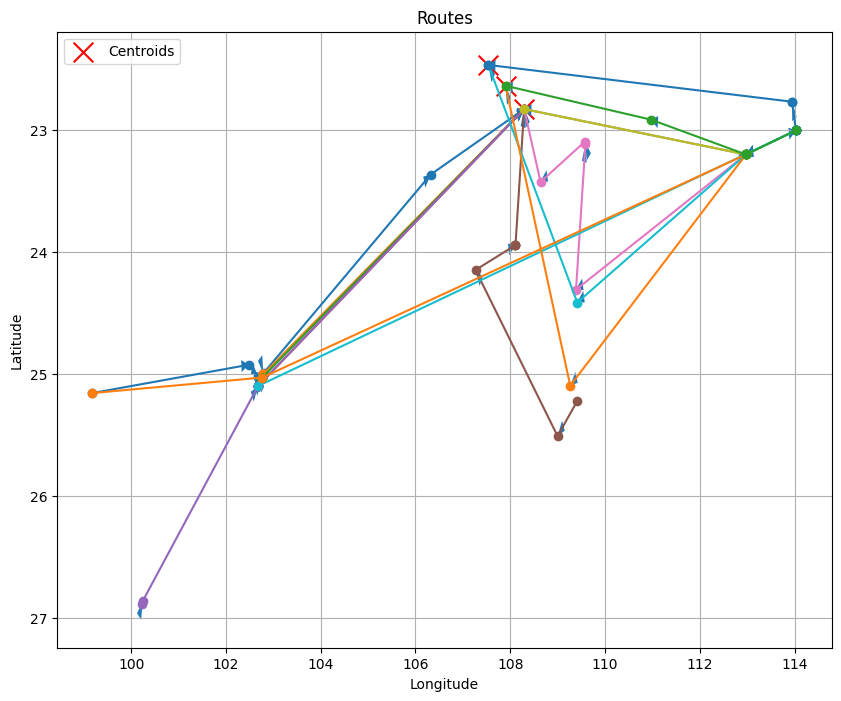

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# 定义函数绘制带有方向的路线
def plot_route_with_direction(route):
    route = route[::-1]  # 由于地图坐标系与常规坐标系不同，需要对路线进行反转
    x = [point[1] for point in route]
    y = [point[0] for point in route]
    plt.plot(x, y, marker='o')
    # 绘制每一段路径的方向
    for i in range(len(route) - 1):
        plt.arrow(route[i][1], route[i][0], route[i + 1][1] - route[i][1], route[i + 1][0] - route[i][0], 
                  shape='full', lw=0, length_includes_head=True, head_width=0.1)

# 定义函数绘制点
def plot_centroids(centroids):
    x = [point[1] for point in centroids]
    y = [point[0] for point in centroids]
    plt.scatter(x, y, marker='x',color='red', label='Centroids',s=200)

# 定义函数设置图形属性
def set_plot_attributes():
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Routes')
    plt.legend()
centroids = np.array([[ 22.82589567, 108.29260899],  
                      [ 22.464021  , 107.53705078],  
                      [ 22.63476185, 107.90104256]])  
# 绘制所有路线图和点

plt.figure(figsize=(10, 8))
plot_centroids(centroids)
for path in all_paths:
    plot_route_with_direction(path)

set_plot_attributes()
plt.gca().invert_yaxis()  # 因为地图坐标系与常规坐标系方向相反，所以需要反转y轴
plt.grid(True)
plt.show()
